## Graph

Before diving into tree, let's understand what is a graph

A graph is a data structure that consists of following two components:
- A finite set of **vertices** also called as **nodes**.
- A finite set of ordered pair of the form $(u, v)$ called as **edge**. 
  - The pair is ordered because (u, v) is not same as (v, u) in case of directed graph(di-graph). 
  - The pair of form (u, v) indicates that there is an edge from vertex u to vertex v.
  - The edges may contain weight/value/cost.

### Directed Graph

```{mermaid}
graph LR
  A --> B
  A --> C
  B --> D
  C --> D
  D --> A
```

- Nodes: $\{A, B, C, D\}$
- Edges: $\{(A, B), (A, C), (B, D), (C, D), (D, A)\}$

Notice that $(A, B)$ is not same as $(B, A)$. That's because the graph is **directed**

### Undirected Graph

<!-- draw undirected graph -->
```{mermaid}
graph LR
  A --- B
  A --- C
  B --- D
  C --- D
  D --- A
```

In the above graph, $(A, B)$ is same as $(B, A)$. That's because the graph is **undirected**

### Cycle

A cycle is a path of edges and vertices wherein a vertex is reachable from itself

<!-- draw cycle -->
```{mermaid}
graph LR
  A --> B
  B --> C
  C --> D
  D --> A
```

There is a cycle in the above graph. The cycle is $\{A, B, C, D\}$

```{mermaid}
graph LR
  A --> B
  B --> C
  C --> D
  C --> A
```

There is also a cycle in the above graph. The cycle is $\{A, B, C\}$

## Graph Representation

There are two common ways to represent a graph
- Adjacency Matrix
- Adjacency List

### Adjacency Matrix

An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

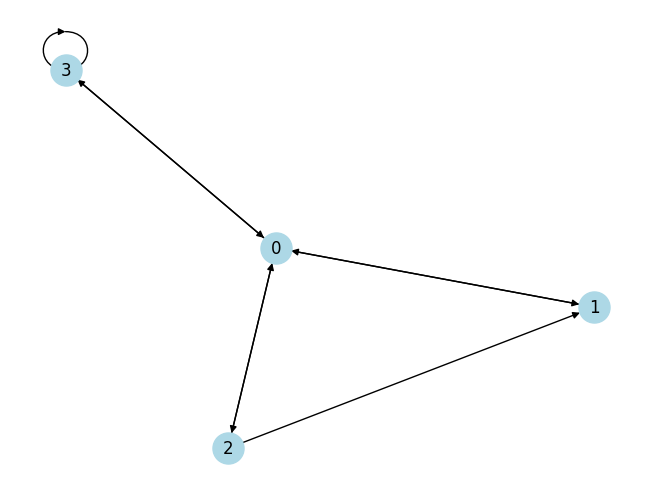

In [8]:
import networkx as nx
import numpy as np
# graph using adjacency matrix, 4 nodes
graph = [[0, 1, 1, 1], 
            [1, 0, 0, 0],
            [1, 1, 0, 0],
            [1, 0, 0, 1]]


# Create a graph from the adjacency matrix
G = nx.DiGraph(np.array(graph))

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)

### Adjacency List

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a vertex in the graph.

The above graph can be represented as follows:


In [9]:
graph = [
    [1, 2, 3],
    [0],
    [0, 1],
    [0, 3]
]

### Edge List

Edge list is a collection of unordered pairs used to represent a finite graph. Each pair describes the edge between two vertices in the graph.

In [ ]:
graph = [(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (2, 1), (3, 0), (3, 2)]

### Adjacency Matrix vs Adjacency List

| Adjacency Matrix | Adjacency List |
| --- | --- |
| Takes $O(V^2)$ space | Takes $O(V + E)$ space |
| Checking if two vertices are connected takes $O(1)$ time | Checking if two vertices are connected takes $O(V)$ time |
| Iterating over all the edges takes $O(V^2)$ time | Iterating over all the edges takes $O(V + E)$ time |

Additional Notes:
When the graph is sparse, adjacency list is generally preferred. When the graph is dense, adjacency matrix is generally preferred.

### Implicit Graph

An implicit graph is a graph that is not represented by an adjacency list or an adjacency matrix. Instead, the graph is defined by a set of states and transitions between those states.

Example: A chess board is an implicit graph. The states are the positions of the pieces on the board. The transitions are the legal moves that can be made by each piece.

# Tree

![tree](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Tree_%28computer_science%29.svg/440px-Tree_%28computer_science%29.svg.png)

Tree is a special type of graph where:
- There is only one path between any two nodes
- There are no cycles 


## Tree Representation

### Adjacency Matrix

Tree can be represented using adjacency matrix. However, it is not a good idea to do so. That's because adjacency matrix takes $O(V^2)$ space. Since tree is a special type of graph (sparse), it is better to use adjacency list to represent it.

### Adjancency List

Tree can be represented as a HashMap, where the key is the node and the value is the list of children.

In [3]:
tree = {}

def add_node(parent, value):
    if parent not in tree:
        tree[parent] = []
    tree[parent].append(value)

add_node(1, 2)
add_node(1, 3)
add_node(1, 4)
add_node(4, 5)
add_node(4, 6)

print(tree)


{1: [2, 3, 4], 4: [5, 6]}


### Node Class

We can create a class to represent a node. Each node has a value and a list of children nodes.

In [2]:
class Node:
    children: list["Node"]
    value: int

    def __init__(self, value):
        self.value = value
        self.children = []
    
    def add_child(self, child):
        self.children.append(child)
    
    def __repr__(self):
        return f"Node({self.value}, {self.children})"

root = Node(1)
root.add_child(Node(2))
root.add_child(Node(3))

child = Node(4)
child.add_child(Node(5))
child.add_child(Node(6))

root.add_child(child)

print(root)

Node(1, [Node(2, []), Node(3, []), Node(4, [Node(5, []), Node(6, [])])])


## Use Cases

### Directory

Tree can be used to represent a directory. Each node is a directory and the children are the files and subdirectories.

```
.
├── _publish.yml
├── _quarto.yml
├── _site
│   ├── agenda
│   │   └── 00-big-o-set.html
│   ├── algorithm
│   │   └── recursion.html
│   ├── cryptography
│   │   ├── 00_cryptographic_hash.html
│   │   └── cryptographic_hash.html
```

It's a tree, isn't it? :)

In [4]:
directory = {}

def add_subpath(parent, child):
    if parent not in directory:
        directory[parent] = []
    directory[parent].append(child)

add_subpath("/", "/home")
add_subpath("/", "/usr")
add_subpath("/home", "/home/user")
add_subpath("/home", "/home/tmp")

print(directory)

{'/': ['/home', '/usr'], '/home': ['/home/user', '/home/tmp']}


### HTML

Well, HTML is a tree. Each node is a tag and the children are the tags inside the tag.

```html
<html>
    <head>
        <title>Tree</title>
    </head>
    <body>
        <h1>Tree</h1>
        <p>Tree is a special type of graph</p>
    </body>
</html>
```

In [10]:
class Tag:
    name: str
    attributes: dict
    children: list

    def __init__(self, name, attributes=None, children=None):
        self.name = name
        self.attributes = attributes or {}
        self.children = children or []

    def __str__(self) -> str:
        # print in HTML format
        childrens = "".join([str(child) for child in self.children])
        attributes = " ".join([f'{key}="{value}"' for key, value in self.attributes.items()])
        return f"<{self.name} {attributes}>{childrens}</{self.name}>"

tag = Tag("html", children=[
    Tag("head", children=[
        Tag("title", children=[
            Tag("text", children=["Hello, world!"])
        ])
    ]),
    Tag("body", children=[
        Tag("div", attributes={"class": "container"}, children=[
            Tag("h1", children=[
                Tag("text", children=["Hello, world!"])
            ])
        ])
    ])
])

print(str(tag))

<html ><head ><title ><text >Hello, world!</text></title></head><body ><div class="container"><h1 ><text >Hello, world!</text></h1></div></body></html>


### Abstract Syntax Tree

Abstract Syntax Tree (AST) is a tree representation of the abstract syntactic structure of source code written in a programming language. Each node is an operator or an operand and the children are the operands of the operator.

<!-- AST illustration -->
![ast](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Abstract_syntax_tree_for_Euclidean_algorithm.svg/800px-Abstract_syntax_tree_for_Euclidean_algorithm.svg.png)

That's the AST for

```python
while b ≠ 0:
    if a > b:
        a := a - b
    else:
        b := b - a
return a
```

Source: [Wikipedia](https://en.wikipedia.org/wiki/Abstract_syntax_tree)

### Binary Search Tree

Binary Search Tree is a tree where each node has at most two children. The left child is smaller than the parent and the right child is greater than the parent.

<!-- draw BST, put numbers in the nodes. Make sure left child is smaller than parent and right child is greater than parent -->
```{mermaid}
graph TB
    10 --> 5
    10 --> 15
    5 --> 3
    5 --> 7
    15 --> 13
    15 --> 17
```

In [13]:
class BST:
    value: int
    left: "BST"
    right: "BST"

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
    def insert(self, value):
        if value < self.value:
            if self.left is None:
                self.left = BST(value)
            else:
                self.left.insert(value)
        else:
            if self.right is None:
                self.right = BST(value)
            else:
                self.right.insert(value)
    
    def __str__(self):
        return f"BST({self.value}, {self.left}, {self.right})"

tree = BST(10)
tree.insert(5)
tree.insert(15)
tree.insert(13)
tree.insert(7)
tree.insert(3)
tree.insert(17)

print(tree)

BST(10, BST(5, BST(3, None, None), BST(7, None, None)), BST(15, BST(13, None, None), BST(17, None, None)))


Well, it's hard to read the above graph. Let's draw it in a better way. Let's learn tree traversal.

## Tree Traversal

```{mermaid}
graph TB
    10 --> 5
    10 --> 15
    5 --> 3
    5 --> 7
    15 --> 13
    15 --> 17
```

### Inorder Traversal

Inorder traversal is a type of depth-first traversal. In inorder traversal, we first visit the left subtree, then the root node, and finally the right subtree.

As the name implies, the output of inorder traversal in a BST is sorted.

In [16]:
def inorder(node):
    if node is None:
        return
    yield from inorder(node.left)
    yield node.value
    yield from inorder(node.right)

print(list(inorder(tree)))


[3, 5, 7, 10, 13, 15, 17]



### Preorder Traversal

Preorder traversal is a type of depth-first traversal. In preorder traversal, we first visit the root node, then the left subtree, and finally the right subtree.


In [17]:
def preorder(node):
    if node is None:
        return
    yield node.value
    yield from preorder(node.left)
    yield from preorder(node.right)

print(list(preorder(tree)))

[10, 5, 3, 7, 15, 13, 17]


### Postorder Traversal

Postorder traversal is a type of depth-first traversal. In postorder traversal, we first visit the left subtree, then the right subtree, and finally the root node.


In [18]:
def postorder(node):
    if node is None:
        return
    yield from postorder(node.left)
    yield from postorder(node.right)
    yield node.value

print(list(postorder(tree)))

[3, 7, 5, 13, 17, 15, 10]


## BST

### Drawing BST

Having learned tree traversal, we can now draw BST in a better way.

In [22]:
def draw(node, level=0):
    if node is None:
        return
    draw(node.right, level + 1)
    print(" " *  4 * level + str(node.value))
    draw(node.left, level + 1)

draw(tree)

        17
    15
        13
10
        7
    5
        3


You need to rotate your head to see the tree ;)

Let's draw in a directory style:

In [31]:
def draw(node, level=0):
    if node is None:
        return
    print("   " * level + "├──" + str(node.value))
    draw(node.left, level + 1)
    draw(node.right, level + 1)

draw(tree)

├──10
   ├──5
      ├──3
      ├──7
   ├──15
      ├──13
      ├──17


### Search on BST

The power of BST is that we can search in $O(\log n)$ time. Let's see how.


In [33]:
tree = BST(10)
tree.insert(5)
tree.insert(15)
tree.insert(13)
tree.insert(7)
tree.insert(3)
tree.insert(17)

draw(tree)

├──10
   ├──5
      ├──3
      ├──7
   ├──15
      ├──13
      ├──17


To search for $7$:

- Start from the root node $10$
- Since $7 < 10$, go to the left child $5$ (we can ignore the **whole** right subtree -> eliminating half* of the tree)
- Since $7 > 5$, go to the right child $7$
- Since $7 = 7$, we found it!

The code is pretty simple, remember recursive? :)

$$
\begin{aligned}
\text{search}(x, k) &=
\begin{cases}
\text{False} & \text{if } x = \text{None} \\
\text{True} & \text{if } x.\text{value} = k \\
\text{search}(x.\text{left}, k) & \text{if } k < x.\text{value} \\
\text{search}(x.\text{right}, k) & \text{if } k > x.\text{value} \\
\end{cases}
\end{aligned}
$$

In [34]:
def search(node, value):
    if node is None:
        return False
    if node.value == value:
        return True
    if value < node.value:
        return search(node.left, value)
    else:
        return search(node.right, value)
    
print(search(tree, 7))
print(search(tree, 8))

True
False


### The problem of BST

BST is a great data structure. It is used in many places. However, it has a problem. The problem is that the height of the tree can be $O(n)$.

It happens when the tree is skewed. For example, if we insert the numbers in ascending order, the tree will be skewed to the right.

In [32]:
tree = BST(10)
for i in range(1, 10):
    tree.insert(i)

draw(tree)

├──10
   ├──1
      ├──2
         ├──3
            ├──4
               ├──5
                  ├──6
                     ├──7
                        ├──8
                           ├──9


That's literally a linked list!

### Solution

WE NEED TO BALANCE THE TREE!

How? We will learn in the next class :)